### OLD DATA

In [ ]:

#import pandas as pd 

## models phi-3, llama-2, llama-3 openchat

# df1 = pd.read_json('results_phi3.json')
# df2 = pd.read_json('results_llama2.json')
# df3 = pd.read_json('results_llama3.json')
# df4 = pd.read_json('results_openchat.json')
# results_all = pd.concat([df1, df2, df3, df4])

# results_all = pd.read_json('overall_results.json')

# results_all = pd.read_json("llama3_new_agent.json")
# results_all = pd.read_json("llama3_greedy_sampler_agent.json")
# results_all = pd.read_json("llama3_greedy_sampler_agent_inverted_pattern.json")


#results_all = pd.read_json("llama3_greedy_sampler_agent_noise_test.json")
#results_all = pd.read_json("llama3_greedy_sampler_agent_random.json")
#results_all = pd.read_json("llama3_greedy_sampler_agent_noise_test_fixed.json")
#
#results_all = pd.read_json("llama3_greedy_sampler_agent_noise_reasoning.json")
#results = pd.DataFrame(results)
#results#.head(5)

#df1 = pd.read_json("./results/old/llama3_greedy_sampler_agent_random.json")
#df2 = pd.read_json("llama3_greedy_sampler_agent_noise_test_fixed.json")
#pd.read_json("llama3_greedy_sampler_agent_noise_reasoning.json")
# df2 = pd.read_json("greedy_sampler_agent_noise_pattern_full.json")
# df2 = pd.read_json("greedy_sampler_agent_normal_pattern_full.json")
# df2 = pd.read_json("greedy_sampler_agent_normal_pattern_8channels.json")
#greedy_sampler_agent_normal_pattern_8channels.json")
#df2 = pd.read_json("./results/paper/greedy_sampler_agent_normal_pattern_full.json")
# df2 = pd.read_json("./results/paper/greedy_sampler_agent_inverted_pattern_full.json")
# df2 = pd.read_json("./results/paper/greedy_sampler_agent_normal_pattern_6channels.json")
# df2 = pd.read_json("./results/paper/greedy_sampler_agent_normal_pattern_8channels.json")
# results_all = pd.concat([df1, df2])

#results = results_all#[results_all['max_length']>10]


### NEW DATA

In [11]:
import pandas as pd

# Load each JSON file into a separate DataFrame and add a label
df1 = pd.read_json("./results/paper/greedy_sampler_agent_normal_pattern_full.json")
df1['label'] = '4-channel cyclic pattern '

df2 = pd.read_json("./results/paper/greedy_sampler_agent_inverted_pattern_full.json")
df2['label'] = '4-channel inverted_cyclic pattern'

df3 = pd.read_json("./results/paper/greedy_sampler_agent_normal_pattern_6channels.json")
df3['label'] = '6-channel cyclic pattern'

df4 = pd.read_json("./results/paper/greedy_sampler_agent_normal_pattern_8channels.json")
df4['label'] = '8-channel cyclic pattern'

# Concatenate all DataFrames
results_all = pd.concat([df1, df2, df3, df4])

# Assign to results
results = results_all

# Display the resulting DataFrame
#print(results)

In [3]:
#"4 3".replace(" ", "")

In [4]:
#results

In [16]:
results = results_all[results_all['max_length']<40]#.tail(1)

In [6]:
results.model.unique()

array(['meta-llama/Meta-Llama-3-8B-Instruct'], dtype=object)

In [9]:
#results.reward_history

### Reward Plots 

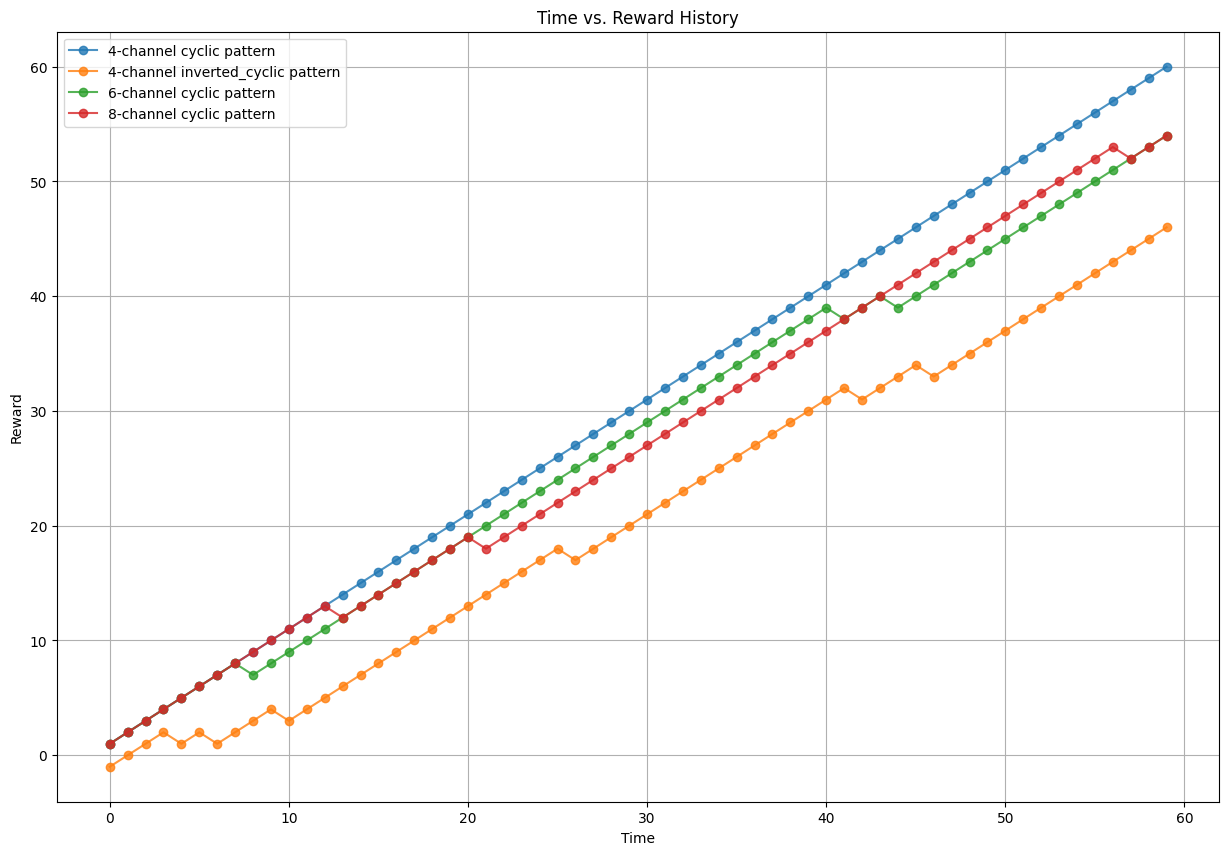

In [12]:
import matplotlib.pyplot as plt

# Create a plot
plt.figure(figsize=(15, 10))

for row in results.iterrows():

    reward_history = row[1]['reward_history']
    time_history = row[1]['time_history']
    label = row[1]['label']
    plt.plot(time_history, reward_history, marker='o', linestyle='-', label=label, alpha=0.8)

plt.title('Time vs. Reward History')
plt.xlabel('Time')
plt.ylabel('Reward')
plt.grid(True)
plt.legend()
plt.show()

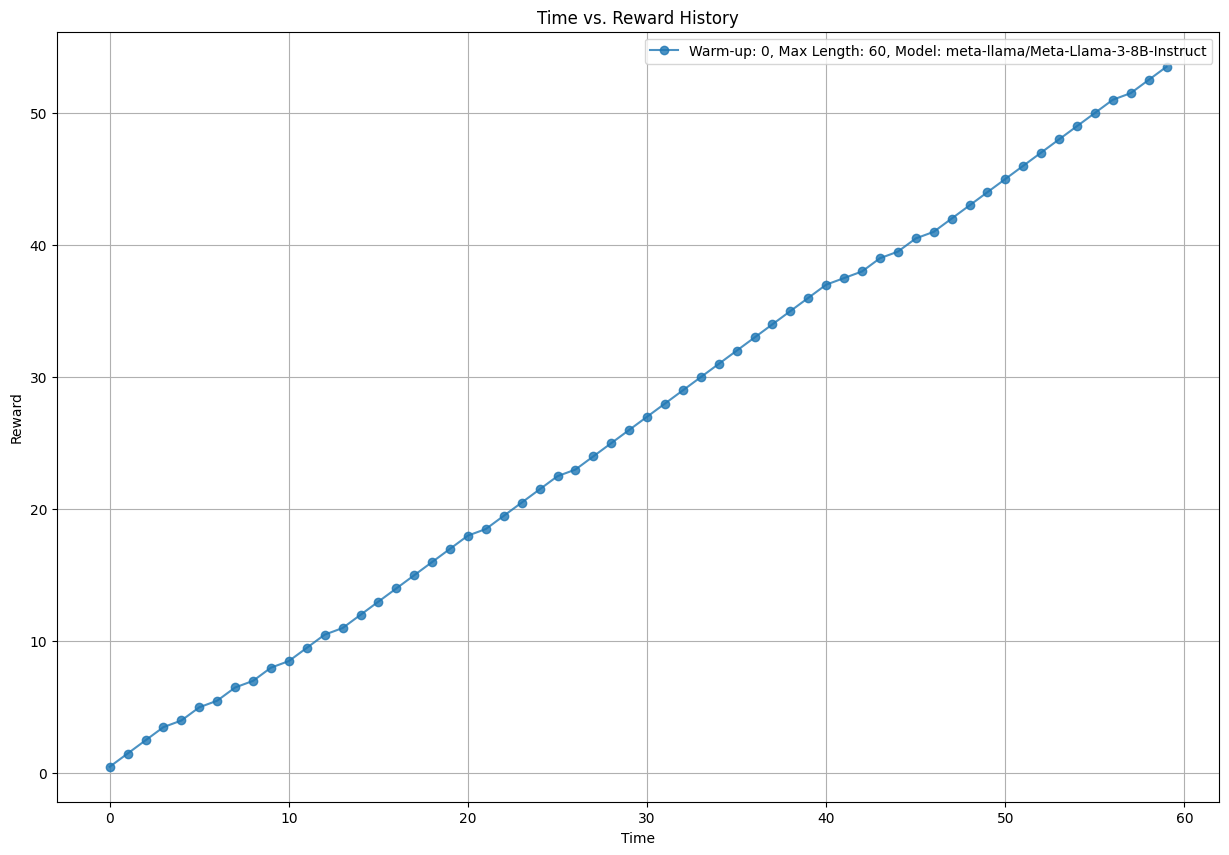

In [5]:
import matplotlib.pyplot as plt

# Create a plot
plt.figure(figsize=(15, 10))

# Calculate the average reward history for random rows
# random_rows = results[results['random']]
# if len(random_rows) > 0:
#     avg_reward_history = random_rows['reward_history'].apply(pd.Series).mean().tolist()
#     plt.plot(results['time_history'].iloc[-1], avg_reward_history[:len(results['time_history'].iloc[-1])], marker='o', linestyle='-', label='Random')

# # Calculate the average reward history for non-random rows with the same warm-up and max_length
non_random_rows = results[~results['random']]
# 
if len(non_random_rows) > 0:
    avg_reward_history = non_random_rows.groupby(['warm_up', 'max_length','model'])['reward_history'].apply(
        lambda x: pd.DataFrame(x.tolist()).mean().tolist()
)
    for (warm_up, max_length, model), reward_history in avg_reward_history.items():
        label = f"Warm-up: {warm_up}, Max Length: {max_length}, Model: {model}"
        plt.plot(results['time_history'].iloc[-1], reward_history[:len(results['time_history'].iloc[-1])], marker='o', linestyle='-', label=label, alpha=0.8)

plt.title('Time vs. Reward History')
plt.xlabel('Time')
plt.ylabel('Reward')
plt.grid(True)
plt.legend()
plt.show()

In [39]:
#reward_history

In [41]:
#reward_max_length_5

In [17]:
results = results_all[results_all['max_length']<40]#.tail(1)

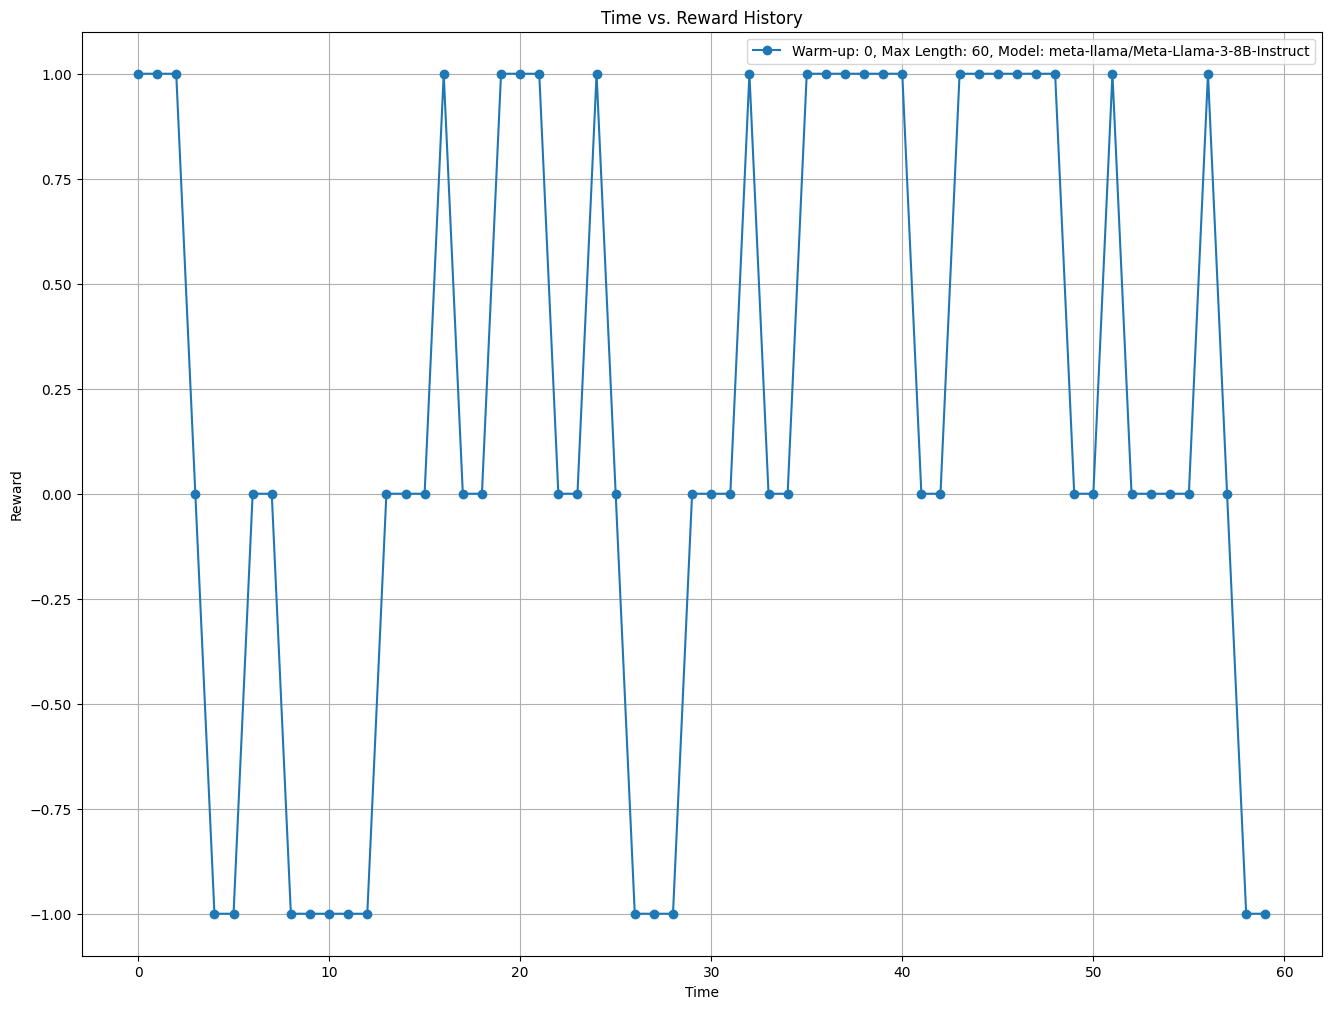

In [8]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(16,12 ))

# Example time points (x-axis)
time = np.arange(0, 41)  # From 0 to 40

# Calculate the average reward history for random rows
random_rows = results[results['random']]
if len(random_rows) > 0:
    avg_reward_history = random_rows['reward_history'].apply(pd.Series).mean().tolist()
    plt.plot(results['time_history'].iloc[0], avg_reward_history, marker='o', linestyle='-', label='Random')

# # Calculate the average reward history for non-random rows with the same warm-up and max_length
non_random_rows = results[~results['random']]
# 
if len(non_random_rows) > 0:
    avg_reward_history = non_random_rows.groupby(['warm_up', 'max_length','model'])['reward_history'].apply(
        lambda x: pd.DataFrame(x.tolist()).mean().tolist()
)
    for (warm_up, max_length, model), reward_history in avg_reward_history.items():
        label = f"Warm-up: {warm_up}, Max Length: {max_length}, Model: {model}"
        # Example reward data (y-axis)


        gradient = np.gradient(reward_history, results['time_history'].iloc[0])
        plt.plot(results['time_history'].iloc[0], gradient, label=label, marker='o')
        

plt.title('Time vs. Reward History')
plt.xlabel('Time')
plt.ylabel('Reward')
plt.grid(True)
plt.legend()
plt.show()
# plt.plot(time, gradient_10, label='Max Length 10', marker='o')
# plt.plot(time, gradient_20, label='Max Length 20', marker='o')
# plt.plot(time, gradient_40, label='Max Length 40', marker='o')
# plt.title('Gradient of Reward vs. Time')
# plt.xlabel('Time')
# plt.ylabel('Gradient of Reward')
# plt.legend()
# plt.grid(True)
# plt.show()


In [13]:
#reward_history

In [15]:
# gradient

In [14]:
#results.states_history.values[0]

In [16]:
# results.action_history.values[1]

In [17]:
# results_all[results_all['model']== 'meta-llama/Meta-Llama-3-8B-Instruct'].iloc[-2:,:]

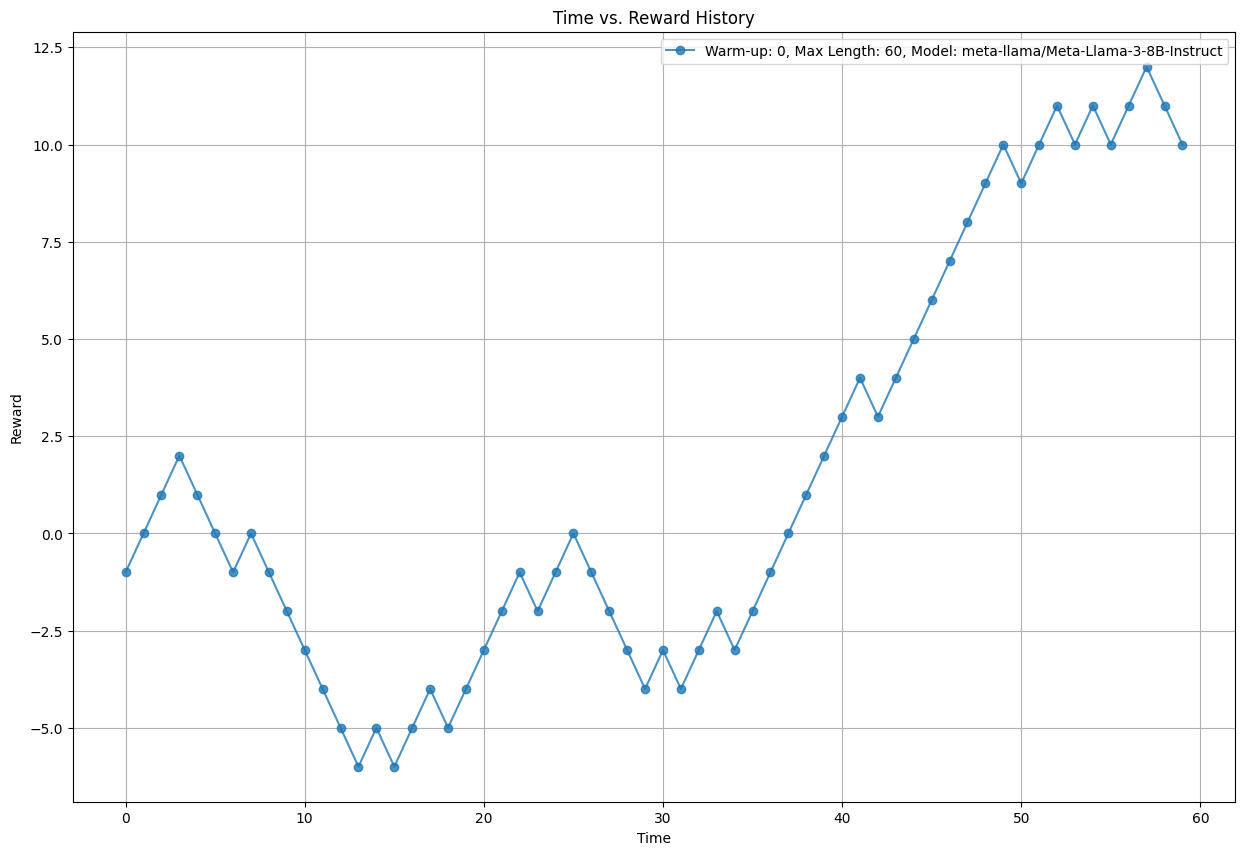

In [7]:
import matplotlib.pyplot as plt

results = results_all[results_all['model']== 'microsoft/Phi-3-mini-4k-instruct'] #meta-llama/Llama-2-7b-chat-hf #microsoft/Phi-3-mini-4k-instruct'] # meta-llama/Meta-Llama-3-8B-Instruct

results = results_all[results_all['model']== 'meta-llama/Meta-Llama-3-8B-Instruct'].iloc[-1:,:]

#results = results[results['max_length']>10]
# Create a plot
plt.figure(figsize=(15, 10))

# Calculate the average reward history for random rows
random_rows = results[results['random']]
if len(random_rows) > 0:
    avg_reward_history = random_rows['reward_history'].apply(pd.Series).mean().tolist()
    plt.plot(results['time_history'].iloc[0], avg_reward_history, marker='o', linestyle='-', label='Random')

# # Calculate the average reward history for non-random rows with the same warm-up and max_length
non_random_rows = results[~results['random']]

if len(non_random_rows) > 0:
    avg_reward_history = non_random_rows.groupby(['warm_up', 'max_length','model'])['reward_history'].apply(
        lambda x: pd.DataFrame(x.tolist()).mean().tolist()
)
    for (warm_up, max_length, model), reward_history in avg_reward_history.items():
        label = f"Warm-up: {warm_up}, Max Length: {max_length}, Model: {model}"
        plt.plot(results['time_history'].iloc[0], reward_history, marker='o', linestyle='-', label=label, alpha=0.8)

plt.title('Time vs. Reward History')
plt.xlabel('Time')
plt.ylabel('Reward')
plt.grid(True)
plt.legend()
plt.show()

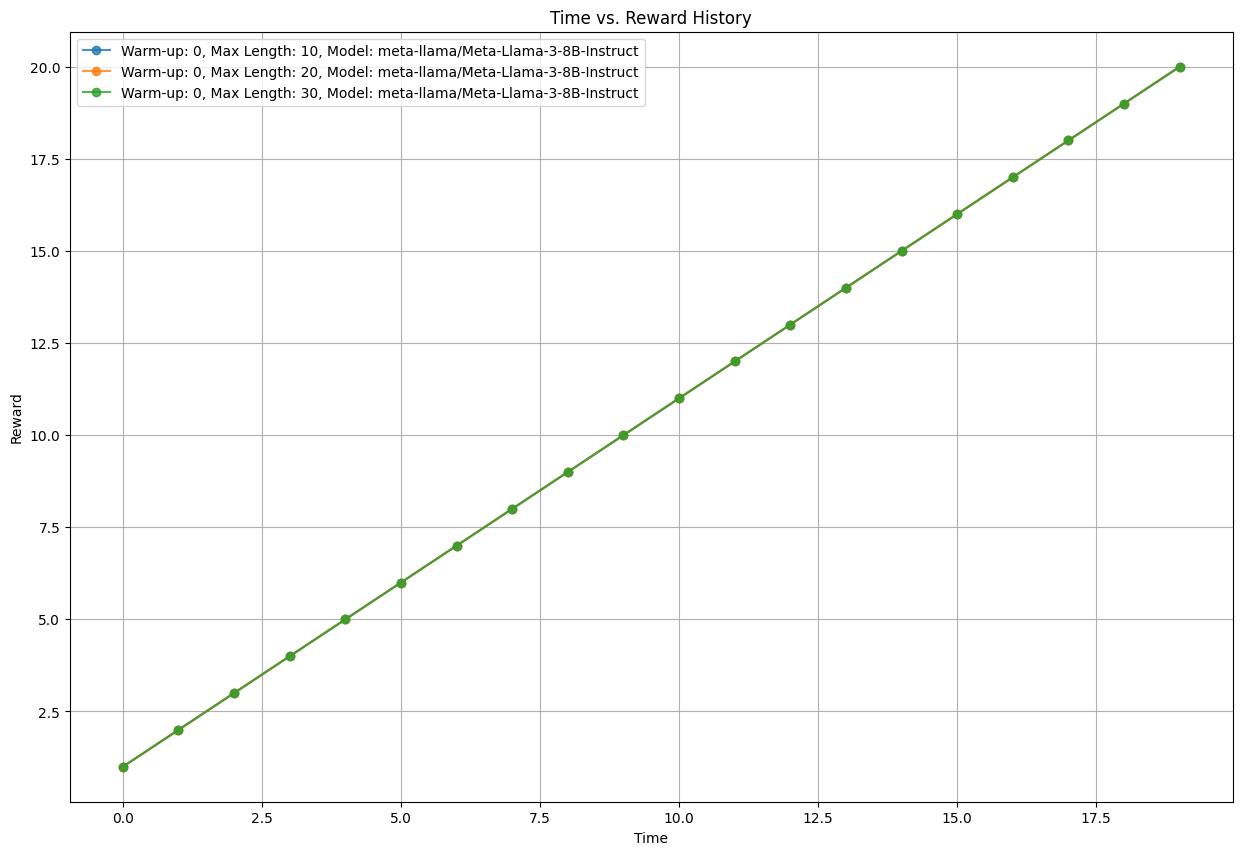

In [8]:
import matplotlib.pyplot as plt

results = results_all[results_all['model']== 'meta-llama/Meta-Llama-3-8B-Instruct']#microsoft/Phi-3-mini-4k-instruct']
#results = results[results['max_length']>10]
# Create a plot
plt.figure(figsize=(15, 10))

# Calculate the average reward history for random rows
random_rows = results[results['random']]
if len(random_rows) > 0:
    avg_reward_history = random_rows['reward_history'].apply(pd.Series).mean().tolist()
    plt.plot(results['time_history'].iloc[0], avg_reward_history, marker='o', linestyle='-', label='Random')

# # Calculate the average reward history for non-random rows with the same warm-up and max_length
non_random_rows = results[~results['random']]

if len(non_random_rows) > 0:
    avg_reward_history = non_random_rows.groupby(['warm_up', 'max_length','model'])['reward_history'].apply(
        lambda x: pd.DataFrame(x.tolist()).mean().tolist()
)
    for (warm_up, max_length, model), reward_history in avg_reward_history.items():
        label = f"Warm-up: {warm_up}, Max Length: {max_length}, Model: {model}"
        plt.plot(results['time_history'].iloc[0], reward_history, marker='o', linestyle='-', label=label, alpha=0.8)

plt.title('Time vs. Reward History')
plt.xlabel('Time')
plt.ylabel('Reward')
plt.grid(True)
plt.legend()
plt.show()

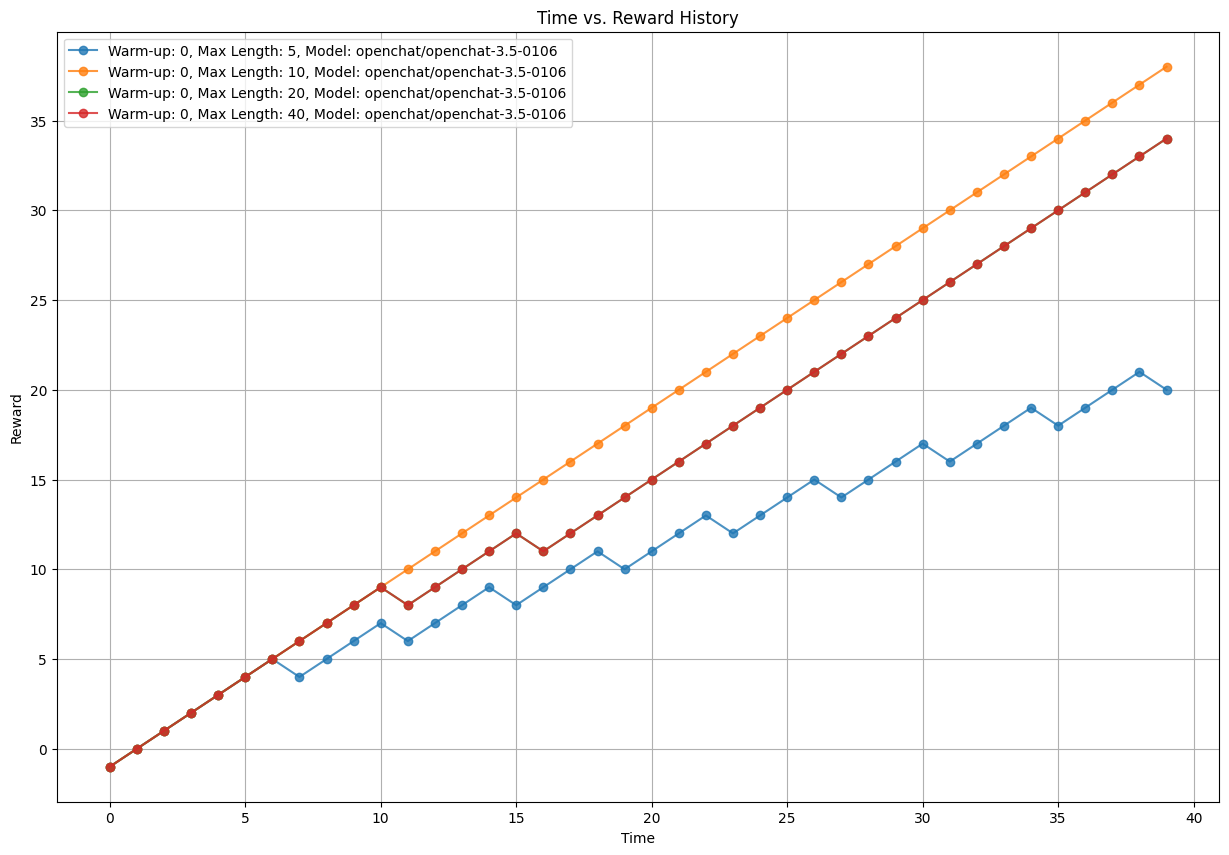

In [8]:
import matplotlib.pyplot as plt

results = results_all[results_all['model']== 'openchat/openchat-3.5-0106']
#results = results[results['max_length']>10]
# Create a plot
plt.figure(figsize=(15, 10))

# Calculate the average reward history for random rows
random_rows = results[results['random']]
if len(random_rows) > 0:
    avg_reward_history = random_rows['reward_history'].apply(pd.Series).mean().tolist()
    plt.plot(results['time_history'].iloc[0], avg_reward_history, marker='o', linestyle='-', label='Random')

# # Calculate the average reward history for non-random rows with the same warm-up and max_length
non_random_rows = results[~results['random']]

if len(non_random_rows) > 0:
    avg_reward_history = non_random_rows.groupby(['warm_up', 'max_length','model'])['reward_history'].apply(
        lambda x: pd.DataFrame(x.tolist()).mean().tolist()
)
    for (warm_up, max_length, model), reward_history in avg_reward_history.items():
        label = f"Warm-up: {warm_up}, Max Length: {max_length}, Model: {model}"
        plt.plot(results['time_history'].iloc[0], reward_history, marker='o', linestyle='-', label=label, alpha=0.8)

plt.title('Time vs. Reward History')
plt.xlabel('Time')
plt.ylabel('Reward')
plt.grid(True)
plt.legend()
plt.show()

In [16]:
#sample.action_history.values[0]

In [7]:
results_all[(results_all['model']==model) & (results_all['max_length']==max_length)]

,model,warm_up,max_length,time_history,reward_history,action_history,states_history,random
0,meta-llama/Meta-Llama-3-8B-Instruct,0,8,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-1, 0, -1, -2, -3, -4, -5, -6, -7, -8, -9, -1...","[None, [3, 27, 38, 26, 22], [4, 26, 45, 27, 20...","[[44, 23, 24, 21], [23, 42, 25, 23], [24, 22, ...",False


In [18]:
# data_pr

### Signal plot

Actions that were undefined:  0


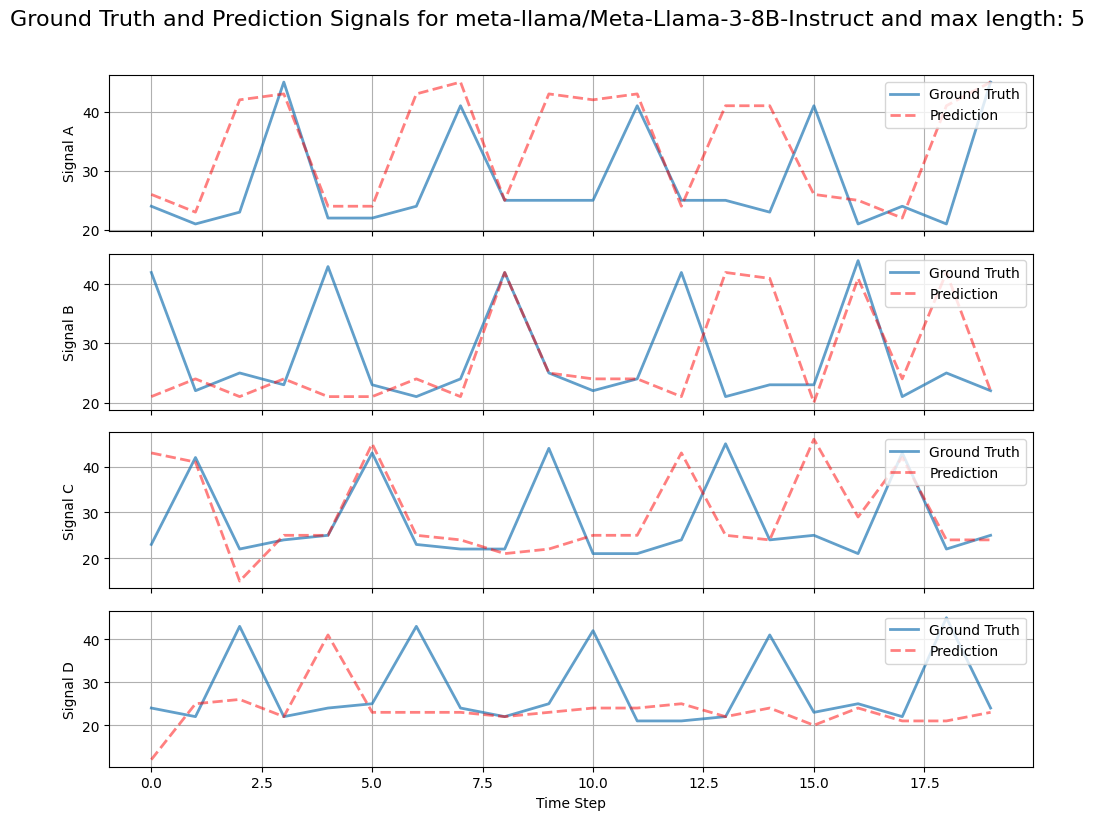

In [7]:
import matplotlib.pyplot as plt
model ='meta-llama/Meta-Llama-3-8B-Instruct'# "microsoft/phi-2"#"openchat/openchat-3.5-0106"
max_length = 5
sample = results_all[(results_all['model']==model) & (results_all['max_length']==max_length)]#.states_history.values[0]
data_gt = sample.states_history.values[0][1:]
data_pr = sample.action_history.values[0]


counter_undefined = 0
for action in data_pr: 
    if action == -100 or action==None:
        counter_undefined += 1
print("Actions that were undefined: ", counter_undefined)

data_pr = [[0,0,0,0] if action == -100 or action==None else action for action in data_pr]

# Transpose the data to get columns as separate lists
# This makes it easy to iterate over each signal
transposed_data_gt = list(zip(*data_gt))


transposed_data_pr = list(zip(*data_pr))

# Number of subplots
num_signals = len(transposed_data_gt)

# Create a figure and an array of subplots with 1 column and `num_signals` rows
fig, axes = plt.subplots(nrows=num_signals, ncols=1, figsize=(10, 2 * num_signals), sharex=True)

# Add an overall title to the figure
fig.suptitle(f'Ground Truth and Prediction Signals for {model} and max length: {max_length}', fontsize=16, y=1.02)

channels = ['A', 'B', 'C', 'D']

# Iterate over each signal and plot it in a separate subplot
for i, (ax, signal_gt, signal_pr) in enumerate(zip(axes, transposed_data_gt, transposed_data_pr)):
    # Step plot for each binary signal

    ax.plot(range(len(signal_gt)), signal_gt, label='Ground Truth', linewidth=2, alpha=0.7)
    # Prediction with dashed line and lower opacity
    ax.plot(range(len(signal_pr)), signal_pr, linestyle='--', color='red', label='Prediction', linewidth=2, alpha=0.5)

    #ax.set_ylim(-0.1, 1.1)  # Keep the y-axis limited to show binary signals clearly
    ax.set_ylabel(f'Signal {channels[i]}')
    ax.grid(True)
    # Add legend to each subplot
    ax.legend(loc='upper right')

# General settings
plt.xlabel('Time Step')
fig.tight_layout()
plt.show()

### Binary signal plot 

In [19]:
#results.states_history.values[0]
#results

In [3]:
#print(results.model.unique())
#print(results.max_length.unique())

In [20]:
sample = results_all[(results_all['model']==model) & (results_all['max_length']==max_length)]#.states_history.values[0]
sample

,model,warm_up,max_length,time_history,reward_history,action_history,states_history,random
6,meta-llama/Llama-2-7b-chat-hf,0,10,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-1, -2, -3, -2, -3, -4, -5, -4, -5, -6, -7, -...","[None, None, None, None, None, None, None, Non...","[[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0,...",False


Actions that were undefined:  0


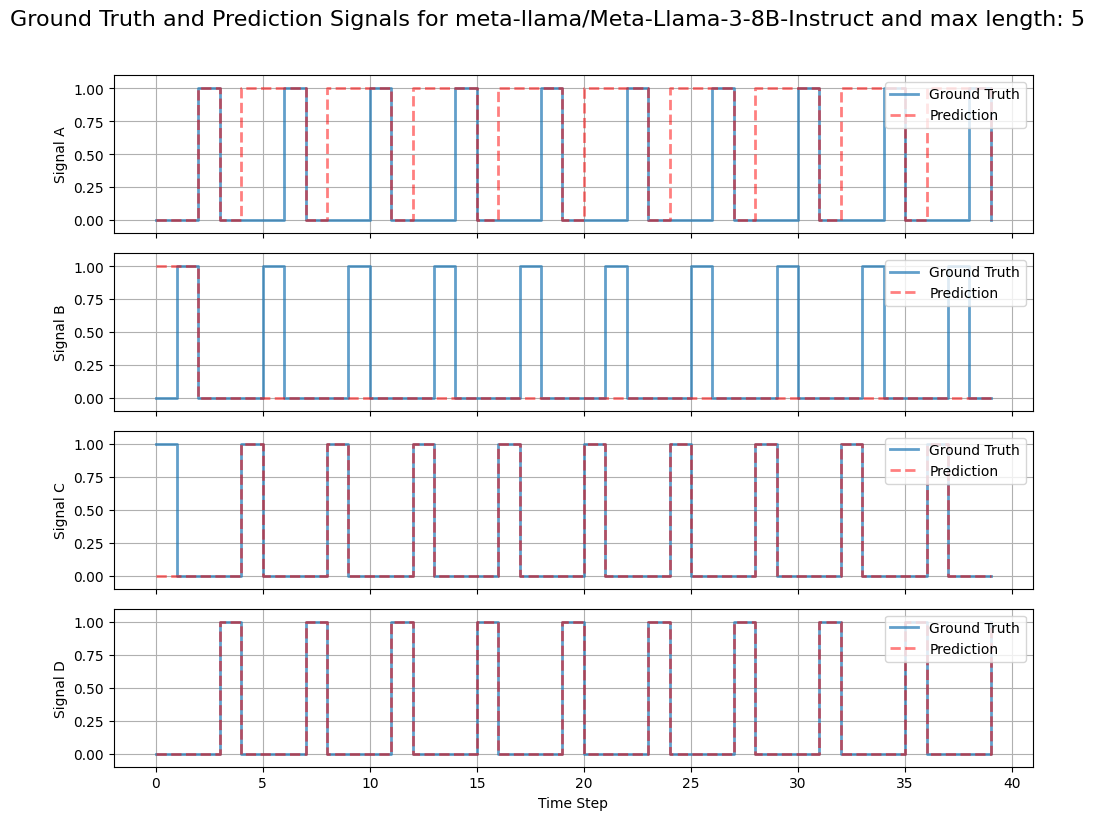

In [19]:
'microsoft/phi-2', 'microsoft/Phi-3-mini-4k-instruct',
'meta-llama/Llama-2-7b-chat-hf',
'meta-llama/Meta-Llama-3-8B-Instruct'

model ='meta-llama/Meta-Llama-3-8B-Instruct'#"meta-llama/Llama-2-7b-chat-hf" #'meta-llama/Meta-Llama-3-8B-Instruct'# "microsoft/phi-2"#"openchat/openchat-3.5-0106"
max_length = 5
sample = results_all[(results_all['model']==model) & (results_all['max_length']==max_length)]#.states_history.values[0]
data_gt = sample.states_history.values[0][1:]
data_pr = sample.action_history.values[0]


counter_undefined = 0
for action in data_pr: 
    if action == -100:
        counter_undefined += 1
print("Actions that were undefined: ", counter_undefined)

data_pr = [[0,0,0,0] if action == -100 else action for action in data_pr]

# Transpose the data to get columns as separate lists
# This makes it easy to iterate over each signal
transposed_data_gt = list(zip(*data_gt))


transposed_data_pr = list(zip(*data_pr))

# Number of subplots
num_signals = len(transposed_data_gt)

# Create a figure and an array of subplots with 1 column and `num_signals` rows
fig, axes = plt.subplots(nrows=num_signals, ncols=1, figsize=(10, 2 * num_signals), sharex=True)

# Add an overall title to the figure
fig.suptitle(f'Ground Truth and Prediction Signals for {model} and max length: {max_length}', fontsize=16, y=1.02)

channels = ['A', 'B', 'C', 'D']

# Iterate over each signal and plot it in a separate subplot
for i, (ax, signal_gt, signal_pr) in enumerate(zip(axes, transposed_data_gt, transposed_data_pr)):
    # Step plot for each binary signal

    ax.step(range(len(signal_gt)), signal_gt, where='post', label='Ground Truth', linewidth=2, alpha=0.7)
    # Prediction with dashed line and lower opacity
    ax.step(range(len(signal_pr)), signal_pr, where='post', linestyle='--', color='red', label='Prediction', linewidth=2, alpha=0.5)

    ax.set_ylim(-0.1, 1.1)  # Keep the y-axis limited to show binary signals clearly
    ax.set_ylabel(f'Signal {channels[i]}')
    ax.grid(True)
    # Add legend to each subplot
    ax.legend(loc='upper right')

# General settings
plt.xlabel('Time Step')
fig.tight_layout()
plt.show()

Actions that were undefined:  0


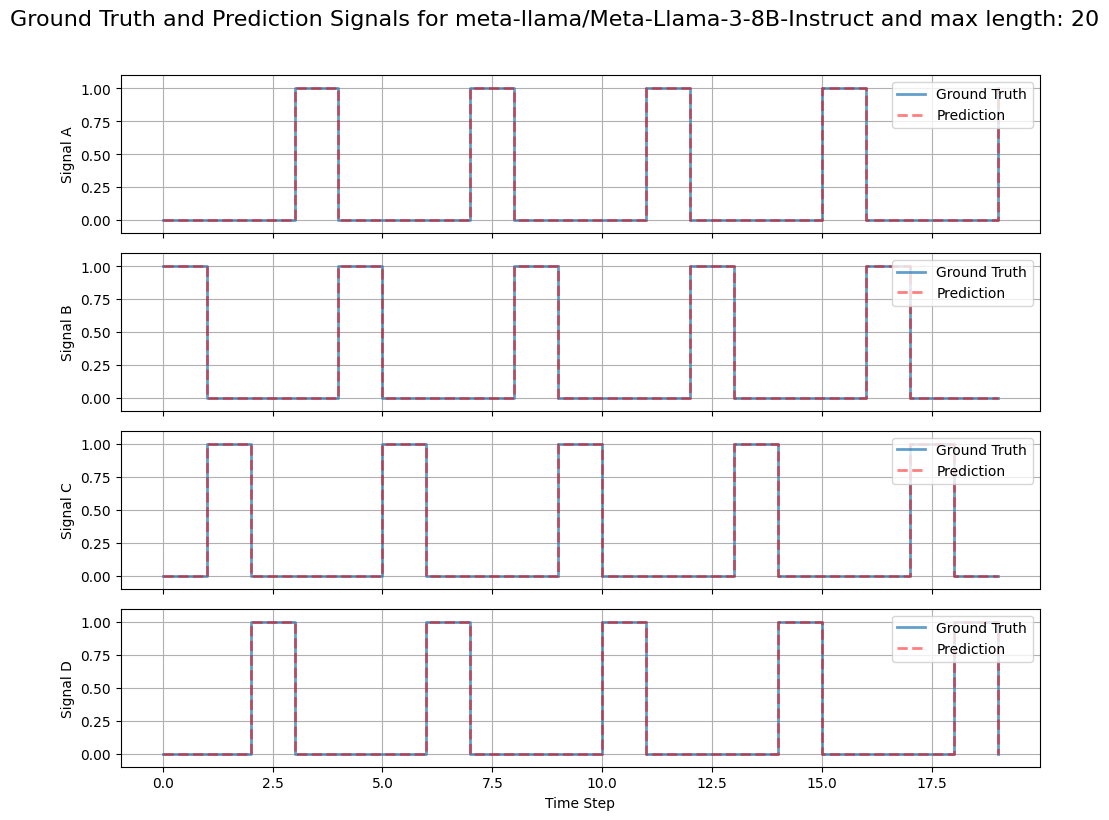

In [17]:
model ='meta-llama/Meta-Llama-3-8B-Instruct'# "microsoft/phi-2"#"openchat/openchat-3.5-0106"
max_length = 20
sample = results_all[(results_all['model']==model) & (results_all['max_length']==max_length)]#.states_history.values[0]
data_gt = sample.states_history.values[0][1:]
data_pr = sample.action_history.values[0]


counter_undefined = 0
for action in data_pr: 
    if action == -100:
        counter_undefined += 1
print("Actions that were undefined: ", counter_undefined)

data_pr = [[0,0,0,0] if action == -100 else action for action in data_pr]

# Transpose the data to get columns as separate lists
# This makes it easy to iterate over each signal
transposed_data_gt = list(zip(*data_gt))

transposed_data_pr = list(zip(*data_pr))

# Number of subplots
num_signals = len(transposed_data_gt)

# Create a figure and an array of subplots with 1 column and `num_signals` rows
fig, axes = plt.subplots(nrows=num_signals, ncols=1, figsize=(10, 2 * num_signals), sharex=True)

# Add an overall title to the figure
fig.suptitle(f'Ground Truth and Prediction Signals for {model} and max length: {max_length}', fontsize=16, y=1.02)

channels = ['A', 'B', 'C', 'D']

# Iterate over each signal and plot it in a separate subplot
for i, (ax, signal_gt, signal_pr) in enumerate(zip(axes, transposed_data_gt, transposed_data_pr)):
    # Step plot for each binary signal

    ax.step(range(len(signal_gt)), signal_gt, where='post', label='Ground Truth', linewidth=2, alpha=0.7)
    # Prediction with dashed line and lower opacity
    ax.step(range(len(signal_pr)), signal_pr, where='post', linestyle='--', color='red', label='Prediction', linewidth=2, alpha=0.5)

    ax.set_ylim(-0.1, 1.1)  # Keep the y-axis limited to show binary signals clearly
    ax.set_ylabel(f'Signal {channels[i]}')
    ax.grid(True)
    # Add legend to each subplot
    ax.legend(loc='upper right')

# General settings
plt.xlabel('Time Step')
fig.tight_layout()
plt.show()

In [ ]:
#NBVAL_IGNORE_OUTPUT
model = HookedTransformer.from_pretrained("gpt2-small", device=device)